In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import matplotlib

In [3]:
with open("../data/fastq_raw/reads_per_sample.txt", "r") as fi:
    fof = fi.read().splitlines()

sample = fof[0::2]
reads = fof[1::2]
    

In [4]:
df = pd.DataFrame()
df["Sample"] = sample
df["reads"] = reads

In [5]:
name = []
order = []
fwrv = []
for e in sample:
    a = e.split("_")
    name.append(a[0])
    order.append(a[1][1:])
    fwrv.append(a[2])

In [6]:
df["Name"] = name
df["Order"] = order
df["fwrv"] = fwrv

df = df[df["Name"] != "Undetermined"]

df["reads"] = df["reads"].astype(int)

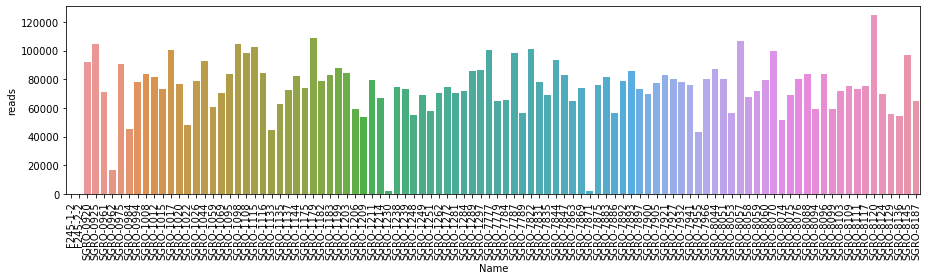

In [10]:
fig, ax = plt.subplots(figsize = (13,4))
sns.barplot(data = df[df["fwrv"] == "R1"], x = "Name", y = "reads")
plt.xticks(rotation="vertical")
matplotlib.rcParams['pdf.fonttype'] = 42
plt.tight_layout()
plt.savefig("../analysis/plots/depth_perSample.pdf")

In [11]:
samples = df[~df["Name"].str.contains("F245")]
blank = df[df["Name"].str.contains("F245")]

/beegfs/group_lp/home/CMonzo/software/miniconda3/envs/MPI_cmc/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


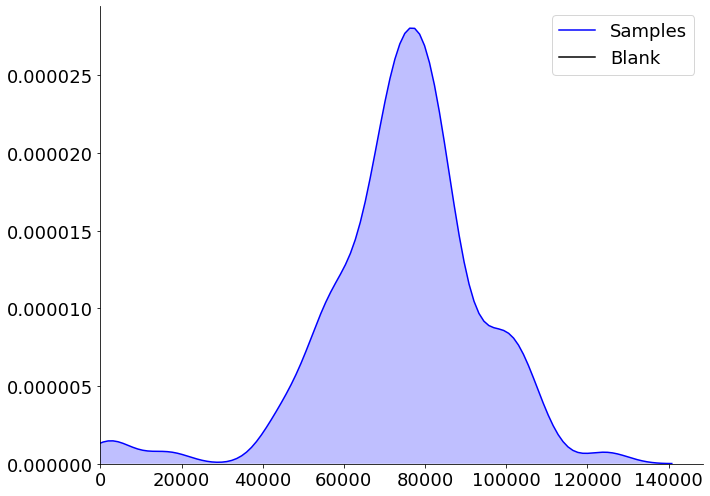

In [14]:
fig, ax = plt.subplots(figsize = (10,7))
ax = sns.kdeplot(samples["reads"], color = "blue", shade = True, label = "Samples")
ax = sns.kdeplot(blank["reads"], color = "black", shade = True, label = "Blank")

plt.xlim(0, None)
plt.ylim(0, None)

#plt.axvline(220, 0, 300, color = "red")

ax.tick_params(axis = "x", labelsize=18)
ax.tick_params(axis = "y", labelsize=18)

plt.legend(prop = {'size':18})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
matplotlib.rcParams['pdf.fonttype'] = 42
plt.tight_layout()
plt.savefig("../analysis/plots/distribution_zoom_merged.pdf")